04/04/2020

<h2> Тимофеев М.В., ПГС-17 </h2>

<h3><i> Описание: </h3>
Расчётный документ создан в програмно-вычислительной среде JupiterNotebook на языке Python 3.<br/>
После символа # идут комментарии <br/>
Единицы измерения: система СИ 
Индексация массивов начинается с 0, т.е. ИГЭ-1 соответствует нулевому элементу массива
</i>

<h1> <font color='red'> Задача №1 Построить эпюру вертикальных напряжений от собственного веса грунта <font color='red'></h1>

In [1]:
# Подключение библиотек:
from math import *  # Математическая
import matplotlib.pyplot as plt  # Построение графиков
import matplotlib.ticker as ticker

<h2> <font color='blue'> 1.1 Исходные данные:  </font> </h2>

In [2]:
# Исходные данные
# Инженерно-геологические элементы:
ИГЭ =  [{'name': 'ИГЭ-1', 'h': 2., 'gamma_s': 27.e3, 'gamma':21.3e3, 'e':0.61, 'type':'супесь'}, 
    {'name': 'ИГЭ-2', 'h': 3., 'gamma_s': 26.7e3, 'gamma':20.5e3, 'e':0.55, 'type':'песок'}, 
    {'name': 'ИГЭ-3', 'h': 2.5, 'gamma_s': 27.6e3, 'gamma':19.5e3, 'e':0.42, 'type':'глина водоупорная'}, 
    {'name': 'ИГЭ-4', 'h': 3., 'gamma_s': 26.5e3, 'gamma':19.3e3, 'e':0.3, 'type':'песок'}]

In [3]:
d_w = 4.  # Уровень грунтовых вод

<h2> <font color='blue'> 1.2 Расчёт напряжений в характерных точках:  </font> </h2>

In [4]:
gamma_w = 9.81*1000.  # Удельный вес воды
gamma_sb_2 = ceil((ИГЭ[1]['gamma_s'] - gamma_w)/(1. + ИГЭ[1]['e']))

gamma_sb_2

10897

In [5]:
# Напряжения и глубина расчётных точек №0..5
z_0 = 0.
sigma_0 = 0.

z_1 = ИГЭ[0]['h']
sigma_1 = ceil(ИГЭ[0]['h']*ИГЭ[0]['gamma'])

z_2 = d_w
sigma_2 = ceil(sigma_1 + (d_w - ИГЭ[0]['h'])*ИГЭ[1]['gamma'])

z_3 = ИГЭ[0]['h'] + ИГЭ[1]['h']
sigma_3 = ceil(sigma_2 + (ИГЭ[0]['h'] + ИГЭ[1]['h'] - d_w)*gamma_sb_2)
sigma_3_1 = ceil(sigma_3 + (ИГЭ[0]['h'] + ИГЭ[1]['h'] - d_w)*gamma_w)

z_4 = ИГЭ[0]['h'] + ИГЭ[1]['h'] + ИГЭ[2]['h']
sigma_4 = ceil(sigma_3_1 + ИГЭ[2]['h']*ИГЭ[2]['gamma'])

z_5 = ИГЭ[0]['h'] + ИГЭ[1]['h'] + ИГЭ[2]['h'] + ИГЭ[3]['h']
sigma_5 = ceil(sigma_4 + ИГЭ[3]['h']*ИГЭ[3]['gamma'])

Точки =  [{'name': '0', 'z': z_0, 'sigma_g':sigma_0}, 
    {'name': '1', 'z': z_1, 'sigma_g':sigma_1},
    {'name': '2', 'z': z_2, 'sigma_g':sigma_2},
    {'name': '3', 'z': z_3, 'sigma_g':sigma_3},
    {'name': '3', 'z': z_3, 'sigma_g':sigma_3_1},
    {'name': '4', 'z': z_4, 'sigma_g':sigma_4},
    {'name': '5', 'z': z_5, 'sigma_g':sigma_5}
]

In [6]:
# Проверка (вывод числовых значений в формате название, глубина, напряжения):
Точки

[{'name': '0', 'z': 0.0, 'sigma_g': 0.0},
 {'name': '1', 'z': 2.0, 'sigma_g': 42600},
 {'name': '2', 'z': 4.0, 'sigma_g': 83600},
 {'name': '3', 'z': 5.0, 'sigma_g': 94497},
 {'name': '3', 'z': 5.0, 'sigma_g': 104307},
 {'name': '4', 'z': 7.5, 'sigma_g': 153057},
 {'name': '5', 'z': 10.5, 'sigma_g': 210957}]

<h2> <font color='blue'> 1.3 Построение эпюры:  </font> </h2>

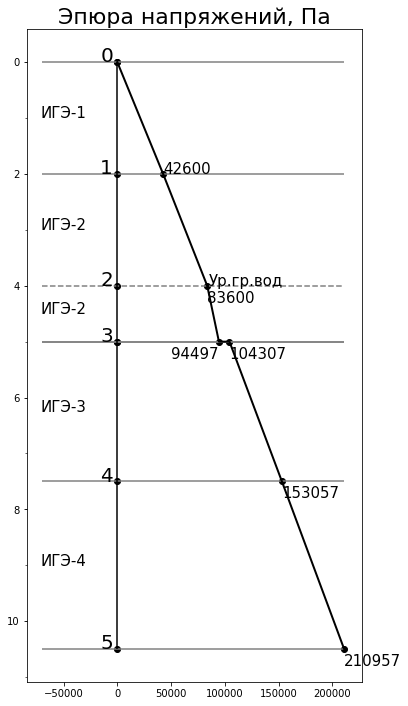

In [7]:
# Построение эпюры напряжений (формирование графического вывода):
y = [Точки[0]['z'], Точки[1]['z'], Точки[2]['z'], Точки[3]['z'], Точки[4]['z'], Точки[5]['z'], Точки[6]['z']]
x = [Точки[0]['sigma_g'],Точки[1]['sigma_g'], Точки[2]['sigma_g'], Точки[3]['sigma_g'], Точки[4]['sigma_g'], Точки[5]['sigma_g'], Точки[6]['sigma_g']]

x_max = max(x) 

fig, ax = plt.subplots()
ax.invert_yaxis()
fig.set_figwidth(6)
fig.set_figheight(12)
ax.plot(x, y, linestyle = '-', linewidth = 2, color = 'black')
ax.scatter(x=x, y=y, marker='o', c='black', edgecolor='black')
ax.hlines(Точки[0]['z'], -70000, x_max, color = 'gray')
ax.hlines(Точки[1]['z'], -70000, x_max, color = 'gray')
ax.hlines(Точки[2]['z'], -70000, x_max, color = 'gray', linestyle = '--')
ax.hlines(Точки[3]['z'], -70000, x_max, color = 'gray')
ax.hlines(Точки[4]['z'], -70000, x_max, color = 'gray')
ax.hlines(Точки[5]['z'], -70000, x_max, color = 'gray')
ax.hlines(Точки[6]['z'], -70000, x_max, color = 'gray')
ax.vlines(0, Точки[0]['z'], Точки[6]['z'])
ax.scatter(x=[0,0,0,0,0,0,0], y=y, marker='o', c='black', edgecolor='black')

ax.text(-10000, Точки[0]['z'], '0', horizontalalignment = 'center', color = 'black', fontsize = 20)
ax.text(-50000, 0.5*(Точки[0]['z']+Точки[1]['z']), 'ИГЭ-1', horizontalalignment = 'center', color = 'black', fontsize = 15)

ax.text(-10000, Точки[1]['z'], '1', horizontalalignment = 'center', color = 'black', fontsize = 20)
ax.text(-50000, 0.5*(Точки[1]['z']+Точки[2]['z']), 'ИГЭ-2', horizontalalignment = 'center', color = 'black', fontsize = 15)
ax.text(Точки[1]['sigma_g'], Точки[1]['z'], Точки[1]['sigma_g'], horizontalalignment = 'left', color = 'black', fontsize = 15)

ax.text(-10000, Точки[2]['z'], '2', horizontalalignment = 'center', color = 'black', fontsize = 20)
ax.text(120000, Точки[2]['z'], 'Ур.гр.вод', horizontalalignment = 'center', color = 'black', fontsize = 15)
ax.text(Точки[2]['sigma_g'], Точки[2]['z']+0.3, Точки[2]['sigma_g'], horizontalalignment = 'left', color = 'black', fontsize = 15)

ax.text(-10000, Точки[3]['z'], '3', horizontalalignment = 'center', color = 'black', fontsize = 20)
ax.text(-50000, 0.5*(Точки[2]['z']+Точки[3]['z']), 'ИГЭ-2', horizontalalignment = 'center', color = 'black', fontsize = 15)
ax.text(Точки[3]['sigma_g'], Точки[3]['z']+0.3, Точки[3]['sigma_g'], horizontalalignment = 'right', color = 'black', fontsize = 15)
ax.text(Точки[4]['sigma_g'], Точки[4]['z']+0.3, Точки[4]['sigma_g'], horizontalalignment = 'left', color = 'black', fontsize = 15)

ax.text(-10000, Точки[5]['z'], '4', horizontalalignment = 'center', color = 'black', fontsize = 20)
ax.text(-50000, 0.5*(Точки[4]['z']+Точки[5]['z']), 'ИГЭ-3', horizontalalignment = 'center', color = 'black', fontsize = 15)
ax.text(Точки[5]['sigma_g'], Точки[5]['z']+0.3, Точки[5]['sigma_g'], horizontalalignment = 'left', color = 'black', fontsize = 15)

ax.text(-10000, Точки[6]['z'], '5', horizontalalignment = 'center', color = 'black', fontsize = 20)
ax.text(-50000, 0.5*(Точки[5]['z']+Точки[6]['z']), 'ИГЭ-4', horizontalalignment = 'center', color = 'black', fontsize = 15)
ax.text(Точки[6]['sigma_g'], Точки[6]['z']+0.3, Точки[6]['sigma_g'], horizontalalignment = 'left', color = 'black', fontsize = 15)

ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title('Эпюра напряжений, Па', fontsize=22)
plt.show()

<h1> <font color='red'> Задача №2 Определить расчетное сопротивление грунта R под подошвой фундамента
бесподвального сооружения <font color='red'></h1>

<h2> <font color='blue'> 2.1 Исходные данные:  </font> </h2>

In [8]:
d = 1.5  # Глубина заложения фундамента, м
b = 4.  # Ширина подошвы, м
c_II = 11.e3  # расчетное значение удельного сцепления грунта, залегающего непосредственно под подошвой фундамента, Па

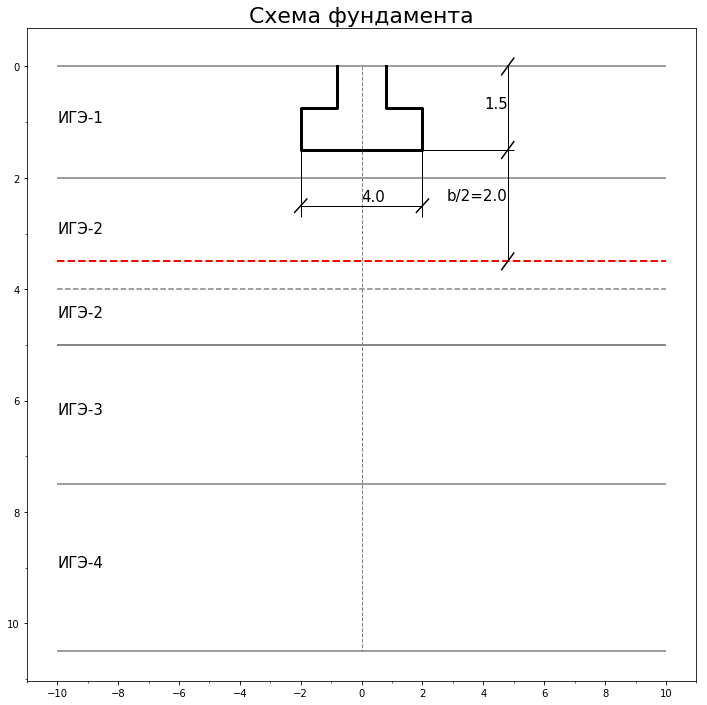

In [9]:
# Построение схемы фундамента
y = [0.*d, 0.5*d, 0.5*d, d, d, 0.5*d, 0.5*d, 0.*d]
x = [-0.2*b, -0.2*b, -0.5*b, -0.5*b, 0.5*b, 0.5*b, 0.2*b, 0.2*b]

fig, ax = plt.subplots()
ax.invert_yaxis()
fig.set_figwidth(12)
fig.set_figheight(12)

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

x_min = -10.
x_max = 10.

ax.hlines(Точки[0]['z'], x_min, x_max, color = 'gray')
ax.hlines(Точки[1]['z'], x_min, x_max, color = 'gray')
ax.hlines(Точки[2]['z'], x_min, x_max, color = 'gray', linestyle = '--')
ax.hlines(Точки[3]['z'], x_min, x_max, color = 'gray')
ax.hlines(Точки[4]['z'], x_min, x_max, color = 'gray')
ax.hlines(Точки[5]['z'], x_min, x_max, color = 'gray')
ax.hlines(Точки[6]['z'], x_min, x_max, color = 'gray')
ax.vlines(0, Точки[0]['z'], Точки[6]['z'], linewidth = 1., color = 'gray', linestyle = '--')

ax.hlines(d, 0.5*b, 0.5*x_max, color = 'black', linewidth = 1.)
ax.hlines(d+0.5*b, x_min, x_max, color = 'red', linewidth = 2., linestyle = '--')
ax.vlines(0.48*x_max, 0., d+0.5*b, linewidth = 1., color = 'black', linestyle = '-')

ax.vlines(-0.5*b, d, d+0.3*b, linewidth = 1., color = 'black', linestyle = '-')
ax.vlines(0.5*b, d, d+0.3*b, linewidth = 1., color = 'black', linestyle = '-')
ax.hlines(d+0.25*b, -0.5*b, 0.5*b, color = 'black', linewidth = 1., linestyle = '-')
ax.text(0, d+0.23*b, b, horizontalalignment = 'left', color = 'black', fontsize = 15)
ax.text(b+0.2*b, 0.5*d, d, horizontalalignment = 'right', color = 'black', fontsize = 15)
ax.text(b+0.2*b, d+0.6*d, 'b/2='+str(0.5*b), horizontalalignment = 'right', color = 'black', fontsize = 15)

ax.text(x_min, 0.5*(Точки[0]['z']+Точки[1]['z']), 'ИГЭ-1', horizontalalignment = 'left', color = 'black', fontsize = 15)
ax.text(x_min, 0.5*(Точки[1]['z']+Точки[2]['z']), 'ИГЭ-2', horizontalalignment = 'left', color = 'black', fontsize = 15)
ax.text(x_min, 0.5*(Точки[2]['z']+Точки[3]['z']), 'ИГЭ-2', horizontalalignment = 'left', color = 'black', fontsize = 15)
ax.text(x_min, 0.5*(Точки[4]['z']+Точки[5]['z']), 'ИГЭ-3', horizontalalignment = 'left', color = 'black', fontsize = 15)
ax.text(x_min, 0.5*(Точки[5]['z']+Точки[6]['z']), 'ИГЭ-4', horizontalalignment = 'left', color = 'black', fontsize = 15)

# Засечки в размерах
arrow_1 = plt.Line2D([-0.5*b-0.2, -0.5*b+0.2], [d+0.28*b, d+0.22*b], color = 'black')
ax.add_line(arrow_1)
arrow_1 = plt.Line2D([0.5*b-0.2, 0.5*b+0.2], [d+0.28*b, d+0.22*b], color = 'black')
ax.add_line(arrow_1)
arrow_1 = plt.Line2D([1.2*b-0.2, 1.2*b+0.2], [0.+0.15, 0.-0.15], color = 'black')
ax.add_line(arrow_1)
arrow_1 = plt.Line2D([1.2*b-0.2, 1.2*b+0.2], [d+0.15, d-0.15], color = 'black')
ax.add_line(arrow_1)
arrow_1 = plt.Line2D([1.2*b-0.2, 1.2*b+0.2], [d+0.5*b+0.15, d+0.5*b-0.15], color = 'black')
ax.add_line(arrow_1)

ax.plot(x, y, linestyle = '-', linewidth = 3., color = 'black')

plt.title('Схема фундамента', fontsize=22)
plt.show()

<h2> <font color='blue'> 2.2 Определение коэффициентов по табл. СП 22.13330.2016:  </font> </h2>

In [10]:
# По таблице 5.4 СП определяем коэффициенты условий работы gamma_c1, gamma_c2:
gamma_c1 = 1.25
gamma_c2 = 1.1

In [11]:
# По таблице 5.5 СП определяем М_gamma, M_q, M_с. Угол fi принимаем равным 27 градусов
М_gamma = 0.91
M_q = 4.64
M_c = 7.14

In [12]:
k = 1.1  # Так как fi определён по табл. прил.А 
k_z = 1.  #  b < 10 м

<h2> <font color='blue'> 2.3 Расчёт сопротивления грунта:  </font> </h2>

Формула для определения расчётного сопротивления грунта (без подвала):
$$R=\frac{\gamma_{c1}\gamma_{c2}}{k}\left( M_{\gamma}k_{z}b\gamma_{II}+M_{q}d_{1}\gamma_{II}^{'}+M_{c}c_{II}  \right)\;\;\;(5.7)$$   

In [13]:
# Осреднённое расчётное значение удельного веса грунтов, залегаюших ниже подошвы фундамента
# Согласно п.5.6.10 определяются для слоя толщиной z=b/2 при b<10 м
gamma_II = ((ИГЭ[0]['h']-d)*ИГЭ[0]['gamma'] + (0.5*b+d-ИГЭ[0]['h'])*ИГЭ[1]['gamma'])/(0.5*b)
gamma_II

20700.0

In [14]:
# Осреднённое расчётное значение удельного веса грунтов, залегаюших выше подошвы фундамента
gamma_II_I = ИГЭ[0]['gamma']

In [15]:
R = gamma_c1*gamma_c2/k*(М_gamma*k_z*b*gamma_II + M_q*d*gamma_II_I + M_c*c_II)
R  # Н/м2

377670.0

In [16]:
# Перевод в кгс/см2:
R/1.e5

3.7767